<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/Ensemble-Algorithms/Bagging/Bagged_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagged Decision Trees

## Table of Contents

1. [Introduction](#intro)
2. [Import Libraries](#libraries)
3. [Sample Dataset](#sample)
4. [Manual Implementation](#manual)
5. [Using Sklearn Library](#sklearn)
6. [Iris Dataset](#iris)
7. [Conclusion](#conclusion)

## 1. Introduction<a id='intro'></a>

## 2. Import Libraries<a id='libraries'></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
from sklearn.datasets import make_circles
from statistics import mode # will be used for prediction

## 3. Sample Dataset<a id='sample'></a>

The dataset contains two input variables ($x_1$ and $x_2$) and the class output variable with the values 0 and 1. The dataset contains 10 records, 5 that belong to each class.

In [14]:
x1 = [2.309572387, 1.500958319, 3.107545266, 4.090032824, 5.38660215, 
      6.451823468, 6.633669528, 8.749958452, 4.589131161, 6.619322828]
x2 = [1.168959634, 2.535482186, 2.162569456, 3.123409313, 2.109488166, 
      0.242952387, 2.749508563, 2.676022211, 0.925340325, 3.831050828]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

df_sample = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df_sample

,x1,x2,y
0,2.309572,1.168960,0
1,1.500958,2.535482,0
2,3.107545,2.162569,0
3,4.090033,3.123409,0
4,5.386602,2.109488,0
5,6.451823,0.242952,1
6,6.633670,2.749509,1
7,8.749958,2.676022,1
8,4.589131,0.925340,1
9,6.619323,3.831051,1


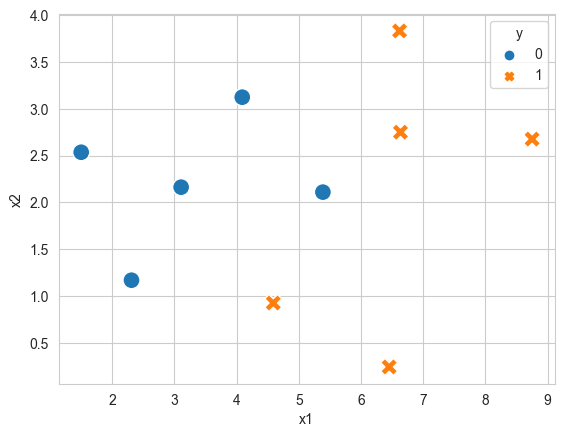

In [9]:
# Distribution of the data for each class
sb.scatterplot(data=df_sample, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

## 4. Manual Implementation<a id='manual'></a>

We will create 3 decision trees from the training data, each with below a usual or normal level of accuracy score.

In [23]:
# Define the function that creates the mode by using the split point 
def create_model(df, split, feature):
  df['Group'] = ''
  df['Prediction'] = ''
  df['Error'] = ''
  right = -1
  left = -1
  
  df.loc[df[feature] <= split, 'Group'] = 'LEFT'
  df.loc[df[feature] > split, 'Group'] = 'RIGHT'

  if df[(df['Group'] == 'RIGHT')].mode().loc[0, 'Group'] == 'RIGHT' and df[(df['Group'] == 'RIGHT')].mode().loc[0, 'y'] == 0:
    right = 0
    left = 1
  if df[(df['Group'] == 'RIGHT')].mode().loc[0, 'Group'] == 'RIGHT' and df[(df['Group'] == 'RIGHT')].mode().loc[0, 'y'] == 1:
    right = 1
    left = 0
  if df[(df['Group'] == 'RIGHT')].mode().loc[0, 'Group'] == 'LEFT' and df[(df['Group'] == 'RIGHT')].mode().loc[0, 'y'] == 0:
    right = 1
    left = 0
  if df[(df['Group'] == 'RIGHT')].mode().loc[0, 'Group'] == 'LEFT' and df[(df['Group'] == 'RIGHT')].mode().loc[0, 'y'] == 1:
    right = 0
    left = 1
  
  df.loc[df['Group'] == 'LEFT', 'Prediction'] = left
  df.loc[df['Group'] == 'RIGHT', 'Prediction'] = right

  df.loc[df['y'] == df['Prediction'], 'Error'] = 0
  df.loc[df['y'] != df['Prediction'], 'Error'] = 1

  acc = (1 - (df['Error'].sum() / len(df))) * 100

  return df, acc

In [29]:
# Copy the data into new dataframe
df = df_sample.copy()

# Define different split points
split1 = {'split': df.loc[4, 'x1'], 'feature':'x1'}
split2 = {'split': df.loc[3, 'x1'], 'feature':'x1'}
split3 = {'split': df.loc[8, 'x2'], 'feature':'x2'}
splits = [split1, split2, split3]

# Create an array to store the accuracy scores for each split point
accArray = []

# Create a new dataframe to store the model parameters based on all split points
df_new = pd.DataFrame(columns=['x1', 'x2', 'y', 'Group', 'Prediction', 'Error'])
for i in range(len(splits)):
  df_temp, acc = create_model(df, splits[i]['split'], splits[i]['feature'])
  df_new = pd.concat([df_new, df_temp], ignore_index=True)
  accArray.append(acc)
df_new

,x1,x2,y,Group,Prediction,Error
0,2.309572,1.168960,0,LEFT,0,0
1,1.500958,2.535482,0,LEFT,0,0
2,3.107545,2.162569,0,LEFT,0,0
3,4.090033,3.123409,0,LEFT,0,0
4,5.386602,2.109488,0,LEFT,0,0
5,6.451823,0.242952,1,RIGHT,1,0
6,6.633670,2.749509,1,RIGHT,1,0
7,8.749958,2.676022,1,RIGHT,1,0
8,4.589131,0.925340,1,LEFT,0,1
9,6.619323,3.831051,1,RIGHT,1,0


In [6]:
accArray

[90.0, 90.0, 70.0]

### Prediction

In [20]:
df_sample['Prediction'] = ''
df_sample['Error'] = ''

for i in range(len(df_sample)):
    prediction = mode([df_new.loc[i, 'Prediction'], df_new.loc[i + len(df_sample), 'Prediction'], 
                       df_new.loc[i + (len(df_sample)*2), 'Prediction']])
    df_sample.loc[i, 'Prediction'] = prediction
df_sample.loc[df_sample['y'] == df_sample['Prediction'], 'Error'] = 0
df_sample.loc[df_sample['y'] != df_sample['Prediction'], 'Error'] = 1

df_sample

,x1,x2,y,Prediction,Error
0,2.309572,1.168960,0,0,0
1,1.500958,2.535482,0,0,0
2,3.107545,2.162569,0,0,0
3,4.090033,3.123409,0,0,0
4,5.386602,2.109488,0,0,0
5,6.451823,0.242952,1,1,0
6,6.633670,2.749509,1,1,0
7,8.749958,2.676022,1,1,0
8,4.589131,0.925340,1,1,0
9,6.619323,3.831051,1,1,0


In [35]:
acc = (1 - (df_sample['Error'].sum() / len(df_sample))) * 100
print('Accuracy: ', acc, '%')

Accuracy:  100.0 %


### Another Sample Data

As you can see the proposed algorithm predicts the labels with 100% accuracy score for the sample dataset. We'll create a new dataset using the `make_circles` with 10% of `noise` to spice things up and check the performance of the Bagged Decision Tree algorithm. The dataset contains two input variables ($x_1$ and $x_2$) and the class output variable with the values 0 and 1. The dataset contains 100 records, 50 that belong to each class.

In [25]:
x, y = make_circles(
    n_samples=100, # 100 observations 
    random_state=101, # if you want the same results as mine
    noise=0.1
)

# Turn it into dataframe
df_new_sample = pd.DataFrame(zip(x[:,0], x[:,1], y), columns=['x1', 'x2', 'y'])
df_new_sample.head()

,x1,x2,y
0,-0.489114,0.856099,0
1,0.827368,0.179709,0
2,0.516329,-0.807108,0
3,-0.365443,0.636141,1
4,-0.032702,-0.660047,1


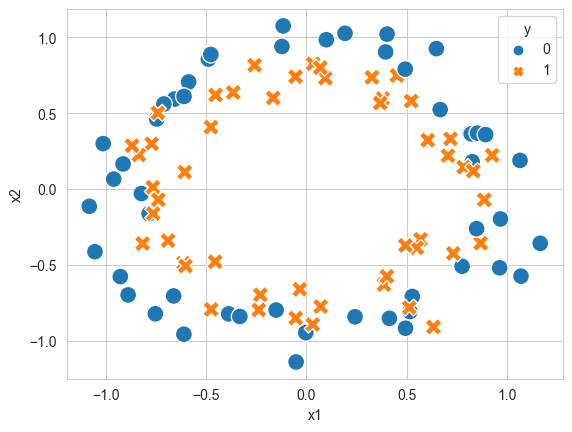

In [26]:
sb.scatterplot(data=df_new_sample, x='x1', y='x2', hue='y', style='y', s=150)
plt.show()

In [28]:
df_new_sample.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,0.011240,-0.008504,0.500000
std,0.646851,0.627636,0.502519
min,-1.083362,-1.138920,0.000000
25%,-0.610774,-0.575471,0.000000
50%,0.014062,0.038997,0.500000
75%,0.555332,0.570122,1.000000
max,1.166711,1.074709,1.000000


In [30]:
# Copy the data into new dataframe
df = df_new_sample.copy()

# Define different split points
split1 = {'split': df_new_sample.loc[4, 'x1'], 'feature':'x1'}
split2 = {'split': df_new_sample.loc[3, 'x1'], 'feature':'x1'}
split3 = {'split': df_new_sample.loc[8, 'x2'], 'feature':'x2'}
splits = [split1, split2, split3]

# Create an array to store the accuracy scores for each split point
accArray = []

# Create a new dataframe to store the model parameters based on all split points
df_new = pd.DataFrame(columns=['x1', 'x2', 'y', 'Group', 'Prediction', 'Error'])
for i in range(len(splits)):
  df_temp, acc = create_model(df, splits[i]['split'], splits[i]['feature'])
  df_new = pd.concat([df_new, df_temp], ignore_index=True)
  accArray.append(acc)
df_new

,x1,x2,y,Group,Prediction,Error
0,-0.489114,0.856099,0,LEFT,0,0
1,0.827368,0.179709,0,RIGHT,1,1
2,0.516329,-0.807108,0,RIGHT,1,1
3,-0.365443,0.636141,1,LEFT,0,1
4,-0.032702,-0.660047,1,LEFT,0,1
...,...,...,...,...,...,...
295,0.069168,0.799748,1,RIGHT,0,1
296,-0.741245,0.502296,1,LEFT,1,0
297,-0.455790,-0.478902,1,LEFT,1,0
298,0.192513,1.026008,0,RIGHT,0,0


In [31]:
accArray

[51.0, 53.0, 51.0]

### Predicting using new sample dataset

In [33]:
df_new_sample['Prediction'] = ''
df_new_sample['Error'] = ''

for i in range(len(df_new_sample)):
    prediction = mode([df_new.loc[i, 'Prediction'], df_new.loc[i + len(df_sample), 'Prediction'], 
                       df_new.loc[i + (len(df_new_sample)*2), 'Prediction']])
    df_new_sample.loc[i, 'Prediction'] = prediction
df_new_sample.loc[df_new_sample['y'] == df_new_sample['Prediction'], 'Error'] = 0
df_new_sample.loc[df_new_sample['y'] != df_new_sample['Prediction'], 'Error'] = 1

df_new_sample

,x1,x2,y,Prediction,Error
0,-0.489114,0.856099,0,0,0
1,0.827368,0.179709,0,1,1
2,0.516329,-0.807108,0,1,1
3,-0.365443,0.636141,1,0,1
4,-0.032702,-0.660047,1,0,1
...,...,...,...,...,...
95,0.069168,0.799748,1,0,1
96,-0.741245,0.502296,1,1,0
97,-0.455790,-0.478902,1,1,0
98,0.192513,1.026008,0,1,1


In [36]:
acc = (1 - (df_new_sample['Error'].sum() / len(df_new_sample))) * 100
print('Accuracy: ', acc, '%')

Accuracy:  48.0 %


🔎 **Observation:** 

## 5. Using Sklearn Library<a id='sklearn'></a>

In [38]:
df_new.to_csv('new.csv')

## 6. Iris Dataset<a id='iris'></a>

## 7. Conclusion<a id='conclusion'></a>

## References
---